**INSTRUCTIONS**



1.  The assignment contains four questions. A few bonus questions are mentioned. 
2.   This assignment is due on **6th Feb, 23:59 **(**No Further extensions**).
3.   Assignment must be implemented in Python 3 only.
4.   You are allowed to use libraries for data preprocessing (numpy, pandas etc) and for evaluation metrics, data visualization (matplotlib etc.).
5.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
6.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
7.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
8.   Any attempts at **plagiarism will be penalized heavily**.
9.   Make sure you run and save your notebooks before submission.
10.  For question 3 of the Decision Trees section, output your model's depth first traversal into ```outputimp.txt``` and submit it along with the ipynb file.
10. Naming convention for the ipynb file is ```<roll_number>_assign1.ipynb```
11. Compress your submission files into a zip file with the naming convention: ```<roll_number>_assign1.zip``` and submit in the portal.

#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [1]:
# To read data from diamonds.csv
import pandas as pd
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]
data.describe()
#print(data) 

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940
unique,273,5,7,8,184,127,11602,554,552,375
top,0.3,Ideal,G,SI1,62,56,605,4.37,4.34,2.7
freq,2604,21551,11292,13065,2239,9881,132,448,437,767




```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [2]:
# To read data from diamonds.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split
import sklearn
from math import sqrt
import timeit
from scipy.spatial import distance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
scaler = MinMaxScaler()

In [3]:
# code for knn regression
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]
data.describe()


data = pd.read_csv('diamonds.csv')

print(data['cut'].unique())
dict_cut = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
print(data['color'].unique())
dict_color = {'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}
print(data['clarity'].unique())
dict_clarity = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}


data['cut']=data['cut'].map(dict_cut)
data['color']=data['color'].map(dict_color)
data['clarity']=data['clarity'].map(dict_clarity)
# print(data)
print(data.shape)

X = data.drop(['price'], axis = 1).values
# X = preprocessing.normalize(X)
X = scaler.fit_transform(X)
y = data['price'].values
# y = y.reshape(1,-1)
# # y = preprocessing.normalize(y)
# y = scaler.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.001,shuffle =True,random_state=123)

print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
(53940, 10)
X_train.shape: (53886, 9)
y_train.shape: (53886,)
X_test.shape: (54, 9)
y_test.shape: (54,)


In [ ]:
def euclidean_distance(a,b):
    return np.linalg.norm(a-b)

def hamming_distance(a,b):
    return distance.hamming(a,b)

def manhattan_distance(a,b):
    return np.sum(abs(a-b))

def MAE(a,b):
    return mean_absolute_error(a,b)

def R2_score(a,b):
    return r2_score(a,b)

def RMSE(a,b):
    return np.sqrt(mean_squared_error(a,b))

In [ ]:
def predict(X,distance_type,k):
    y_pred = [predict_idx(x,distance_type,k) for x in X]
    return np.array(y_pred)

def predict_idx(x,distance_type,k):
    distances = []
    if distance_type == "hamming_distance":
        distances = [hamming_distance(x, x_train) for x_train in X_train]
    elif distance_type == "manhattan_distance":
        distances = [manhattan_distance(x, x_train) for x_train in X_train]
    else:
        distances = [euclidean_distance(x, x_train) for x_train in X_train]
    indexes = np.argsort(distances)[:k]
    price_val = []
    for i in range(k):
        price_val.append(y_train[indexes[i]])
    return np.mean(price_val)

1. b) Do we need to normalise data? [If so Does it make any difference?].


# give proper explanation
Main purpose of normalising the data to convert in a common sacle because of some data which are out of 
range and every time normalisation of data not requred,It is required only when features have different 
ranges.
In this data set(diamond.csv) the data have different ranges so we normalised data and perform operation
on normalised data.
After normalizing , the features are now in a range of their sacle and then their importances w.r.t to distances are better captured
    
Almost prediction using normalised data and original data are same , slightly varry.

2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

In [ ]:
# show all the experiments
k = 3
# distance_type = 'euclidean_distance'
start1 = timeit.default_timer()
predictions1 = predict(X_test,'euclidean_distance',k)
stop1 = timeit.default_timer()

RMSE_val1= RMSE(y_test,predictions1)
print("Root mean square error :",RMSE_val1,"\n")
MAE_val1= MAE(y_test,predictions1)
print("Mean Absolute error :",MAE_val1,"\n")
R2_score_val1= R2_score(y_test,predictions1)
print("R2 Squared score :",R2_score_val1,"\n")

predictions2 = predict(X_test,'manhattan_distance',k)
RMSE_val2= RMSE(y_test,predictions2)
print("Root mean square error :",RMSE_val2,"\n")
MAE_val2= MAE(y_test,predictions2)
print("Mean Absolute error :",MAE_val2,"\n")
R2_score_val2= R2_score(y_test,predictions2)
print("R2 Squared score :",R2_score_val2,"\n")

predictions3 = predict(X_test,'hamming_distance',k)
RMSE_val3= RMSE(y_test,predictions3)
print("Root mean square error :",RMSE_val3,"\n")
MAE_val3= MAE(y_test,predictions3)
print("Mean Absolute error :",MAE_val3,"\n")
R2_score_val3= R2_score(y_test,predictions3)
print("R2 Squared score :",R2_score_val3,"\n")

Root mean square error : 778.1970681997797 

Mean Absolute error : 472.6234567901234 

R2 Squared score : 0.9592904386707943 

Root mean square error : 611.9923528261571 

Mean Absolute error : 380.0185185185185 

R2 Squared score : 0.9748226954709525 

Root mean square error : 2760.459065269544 

Mean Absolute error : 1188.0123456790125 

R2 Squared score : 0.48775247963035306 



In [ ]:
data = pd.read_csv('diamonds.csv')
# print(data['cut'].unique())
dict_cut = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
# print(data['color'].unique())
dict_color = {'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}
# print(data['clarity'].unique())
dict_clarity = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}


data['cut']=data['cut'].map(dict_cut)
data['color']=data['color'].map(dict_color)
data['clarity']=data['clarity'].map(dict_clarity)

X = data.drop(['price'], axis = 1).values
y = data['price'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.001,shuffle =True,random_state=123)

# print(X_train,'\n\nnavneet\n',X_test,'\n\n navneet\n',y_train,'\n\n navneet\n',y_test)
k = 3
distance_type = 'euclidean_distance'
predictionN = predict(X_test,distance_type,k)
RMSE_valN= RMSE(y_test,predictionN)
print("Root mean square error :",RMSE_valN,"\n")

R2_score_valN= R2_score(y_test,predictionN)
print("R2 Squared score :",R2_score_valN,"\n")

Root mean square error : 1016.8952333637228 

R2 Squared score : 0.9304864184528048 



3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [ ]:
# report a table
table ={}
table["Euclidean"]=[RMSE_val1, MAE_val1, R2_score_val1]
table["Manhattan"]=[RMSE_val2, MAE_val2, R2_score_val2]
table["Hamming"]=[RMSE_val3, MAE_val3, R2_score_val3]
table = pd.DataFrame(table, index = ['RMSE', 'MAE','R Squared'])
table

,Euclidean,Manhattan,Hamming
RMSE,778.197068,611.992353,2760.459065
MAE,472.623457,380.018519,1188.012346
R Squared,0.959290,0.974823,0.487752


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

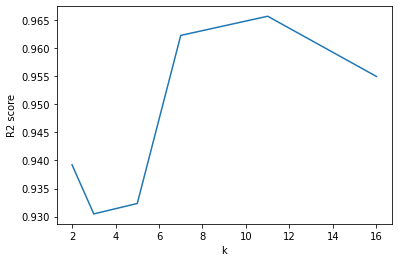

In [ ]:
# plot
k = [2,3,5,7,11,16]
r2Score =[]
for i in range(len(k)):
    predictions = predict(X_test,'euclidean_distance',k[i])
    r2Score.append(R2_score(y_test,predictions))
    
plt.plot(k,r2Score)
plt.xlabel("k")
plt.ylabel("R2 score")
plt.show()

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

# Explanation
No,Values of R squaredare not same,the value k = 11 gives highest R squared score. 

R-squared has ranges from zero to one, with zero indicating that the proposed model does not improve prediction over the mean model, and one indicating perfect prediction. Improvement in the regression model results in proportional increases in R-squared.

1. k should be less than sqrt(n/2) where n is the number of training examples. 

2. The value of K should be odd because if feature value in case of even can be equal so pefer odd values for k
3. Select the K which has the highest R2 score.

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [ ]:
# scikit-learn KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
start2 = timeit.default_timer()
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, y_train)
predicted_y = knn.predict(X_test)
stop2 = timeit.default_timer()
# predicted_Y = predict(X_test,'euclidean_distance',k)

rmse = RMSE(y_test,predicted_y)
print("Root mean squared error :",rmse,"\n")
r2score = R2_score(y_test,predicted_y)
print("R2 Squared score :",r2score,"\n")

Root mean squared error : 715.0685762341104 

R2 Squared score : 0.9656273806432001 



5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

*********************by  implimented model*******************************

Root mean square error: 778.1970681997797 

R2 Squared score : 0.9592904386707943 

Time:  34.90569461599807
**********************by sklearn model************************************

Root mean square error : 715.0685762341104 

R2 Squared score : 0.9656273806432001 

Time:  0.19259510900155874


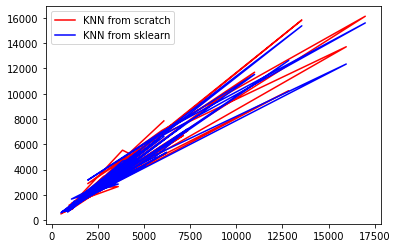

In [ ]:
# Comparison
print("*********************by  implimented model*******************************\n")
RMSE_val1= RMSE(y_test,predictions1)
print("Root mean square error:",RMSE_val1,"\n")
R2_score_val1= R2_score(y_test,predictions1)
print("R2 Squared score :",R2_score_val1,"\n")

print('Time: ', stop1 - start1)
print("**********************by sklearn model************************************\n")
RMSE_val4= RMSE(y_test,predicted_y)
print("Root mean square error :",RMSE_val4,"\n")
R2_score_val4= R2_score(y_test,predicted_y)
print("R2 Squared score :",R2_score_val4,"\n")

print('Time: ', stop2 - start2)

plt.plot(y_test,predictions1, color= 'r')
plt.plot(y_test,predicted_y, color = 'b')
plt.legend(['KNN from scratch','KNN from sklearn']) 
plt.show() 

6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


# report this  along with the experiments
Advantages of KNN:

KNN is called Lazy Learner (Instance based learning).It does not learn anything in the training period.

 It stores the training dataset and learns from it only at the time of making real time predictions.
his makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc.

KNN algorithm requires no training before making predictions,new data can be added seamlessly which will not 
  impact the accuracy of the algorithm.

KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function 
(e.g. Euclidean or Manhattan etc.)

Disadvantages of KNN:

Does not work well with large dataset.In large datasets, the cost of calculating the distance between the new point and 
each existing points is huge which degrades the performance of the algorithm.

The KNN algorithm does not work well with high dimensional data because with large number of dimensions,it becomes difficult for
 the algorithm to calculate the distance in each dimension.

 We need to do feature scaling (standardization and normalization) before applying KNN algorithm to any dataset. 
 If we do not do so, KNN may generate wrong predictions.


# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split
import sklearn
import os
from math import sqrt
from scipy.spatial import distance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from statistics import median
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from google.colab import drive
drive.mount("/content/drive")
FOLDER_PATH = "/content/drive/My Drive"
# datapd.read_csv('diamonds.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mean Square Error: 1615.767060173758
Mean Absolute Error: 1068.3030758125738
R-squared score: 0.8390703715020473 



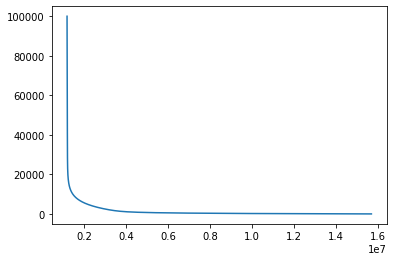

In [ ]:
headers = ["carat", "cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv(os.path.join(FOLDER_PATH,"diamonds.csv"), na_values='?',header=None, names = headers)
data = data.reset_index(drop=True)
data = data.iloc[1:]
# print(data)
scaler = MinMaxScaler()
dict_cut = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
dict_color = {'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}
dict_clarity = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}

data['cut']=data['cut'].map(dict_cut)
data['color']=data['color'].map(dict_color)
data['clarity']=data['clarity'].map(dict_clarity)

l=list(data)
data[l]=data[l].astype(float)

cols=['cut','color','clarity','depth','table','x','y','z']
data[cols]=sklearn.preprocessing.normalize(data[cols])

X=data[data.columns.difference(['price'])].values
# X = scaler.fit_transform(X)
y=data[['price']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.004,shuffle =True,random_state=123)

def model(X, y, lr, itr):
    n = y.shape[0]
    w = np.zeros((X.shape[1],1))
    cost_list = []
    
    for i in range(itr):
        y_pred = np.dot(X,w)        
        cost = (1/(2*n))*np.sum(np.square(y_pred - y))
        dw = (1/n)*np.dot(X.T, y_pred - y)
        w = w - lr * dw
        cost_list.append(cost)
        
    return w,cost_list

def predictY(X,w):
    y_predicted = []
    for data in X:
        y_predicted.append(np.dot(data,w))
    return np.array(y_predicted)
itr = 100000
l_rate= 0.001
w ,cost_list= model(X_train.astype(float), y_train.astype(float), l_rate, itr)
y_predicted = predictY(X_test,w)

print("Mean Square Error:",np.sqrt(mean_squared_error(y_test , y_predicted)))
print( "Mean Absolute Error:", mean_absolute_error(y_test , y_predicted))
print("R-squared score:",r2_score(y_test, y_predicted),"\n") 

itl = list(range(itr))
plt.plot(cost_list,itl)
plt.show()

Linear Regression model (from the scratch)Mean Square Error: 1615.767060173758 ,Mean Absolute Error: 1068.3030758125738 
.R-squared score: 0.8390703715020473 

2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

best suitable features :
 ['carat', 'clarity', 'color', 'cut', 'depth', 'table']
Mean Square Error: 1677.3959328588398
Mean Absolute Error: 1144.271882971737
R-squared score: 0.8718364374347142 



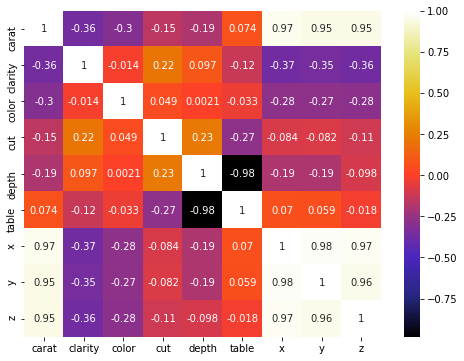

In [ ]:
#code for Correlation between features and the Diamond Price.
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
np.random.seed(123)
plt.figure(figsize=(8,6))
X1=data[data.columns.difference(['price'])]
y1=y=data[['price']]
cor = X1.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap)
def correlation(dataset,threshold):
  col_corr = []
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if corr_matrix.iloc[i,j] >= threshold:
        colname = corr_matrix.columns[i]
        col_corr.append(colname)
  return col_corr
corr_features = correlation(X1,0.95)
# print(len(corr_features))
X1=X1[X1.columns.difference(corr_features)]
l=list(X1)
print("best suitable features :\n",l)
X1= X1.values
y1=y1.values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.002, random_state=42)
w1 ,cost_list1= model(X_train1, y_train1, l_rate, 10000)
# print(w1.shape)

y_predicted1 = predictY(X_test1,w1)

print("Mean Square Error:",np.sqrt(mean_squared_error(y_test1 , y_predicted1)))
print( "Mean Absolute Error:", mean_absolute_error(y_test1 , y_predicted1))
print("R-squared score:",r2_score(y_test1, y_predicted1),"\n")


On the behalf of threshold 0.95. The best suitable features are which have a high correletion value. In the above dataset 
'carat', 'clarity', 'color', 'cut', 'depth', table are the values that have been used for the prediction. becuse remaining are 
corrilated so duplication occur .

Explanation for 2b) - 

2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


O/p values from sklearn LR....................
Mean Square Error: 1087.4769733814428
Mean Absolute Error: 797.5751529578877
R-squared score: 0.9461316666067946 

O/p values from  LR scratch....................
Mean Square Error: 1677.3959328588398
Mean Absolute Error: 1144.271882971737
R-squared score: 0.8718364374347142 



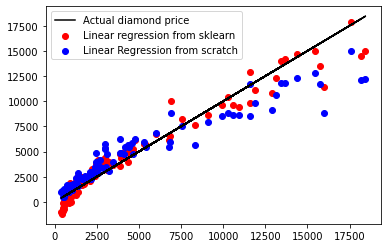

In [ ]:
# import sklearn model
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train1, y_train1) 
y_pred = regr.predict(X_test1) 

print("O/p values from sklearn LR....................")
print("Mean Square Error:",np.sqrt(mean_squared_error(y_test1 , y_pred)))
print( "Mean Absolute Error:", mean_absolute_error(y_test1 , y_pred))
print("R-squared score:",regr.score(X_test1, y_test1),"\n")   

print("O/p values from  LR scratch....................")
print("Mean Square Error:",np.sqrt(mean_squared_error(y_test1 , y_predicted1)))
print( "Mean Absolute Error:", mean_absolute_error(y_test1 , y_predicted1))
print("R-squared score:",r2_score(y_test1 , y_predicted1),"\n") 

plt.scatter(y_test1, y_pred, color= 'r')
plt.scatter(y_test1,y_predicted1, color = 'b')
plt.plot(y_test1,y_test1, color = 'k')
plt.legend(['Actual diamond price','Linear regression from sklearn','Linear Regression from scratch']) 
plt.show() 

Column X,Y,Z are highly correlated which are about 0.95 threshold val so ,if we remove that column from the 
dataset then there is no any affect on the result and and also accuracy no affected by removing that column .

2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


O/p values from sklearn LR....................
Mean Square Error: 1270.29620465602
Mean Absolute Error: 889.1416315327833
R-squared score: 0.9005308264711603 

O/p values from  LR scratch....................
Mean Square Error: 1615.767060173758
Mean Absolute Error: 1068.3030758125738
R-squared score: 0.8390703715020473 



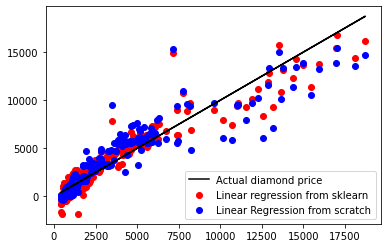

In [ ]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train) 
y_pred2 = regr.predict(X_test) 

print("O/p values from sklearn LR....................")
print("Mean Square Error:",np.sqrt(mean_squared_error(y_test , y_pred2)))
print( "Mean Absolute Error:", mean_absolute_error(y_test , y_pred2))
print("R-squared score:",regr.score(X_test, y_test),"\n")   

print("O/p values from  LR scratch....................")
print("Mean Square Error:",np.sqrt(mean_squared_error(y_test , y_predicted)))
print( "Mean Absolute Error:", mean_absolute_error(y_test , y_predicted))
print("R-squared score:",r2_score(y_test , y_predicted),"\n") 

plt.scatter(y_test, y_pred2, color= 'r')
plt.scatter(y_test,y_predicted, color = 'b')
plt.plot(y_test,y_test, color = 'k')
plt.legend(['Actual diamond price','Linear regression from sklearn','Linear Regression from scratch']) 
plt.show() 

2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


If we compare  KNN with LR in both the cases the r2 score of Lr are better as comapre to the KNN , in the predicted val with the Lr is not much deviated from the actual diamond price.
IN Lr if we choose lr quit high then it not predict much better the KNN  so some drawback are available in both the algorithm 

Explanation - 

2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


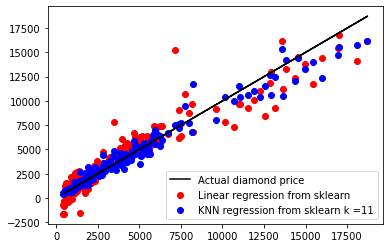

In [ ]:
#plot 
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, y_train)
predicted_y = knn.predict(X_test)

plt.scatter(y_test, y_pred, color= 'r')
plt.scatter(y_test,predicted_y, color = 'b')
plt.plot(y_test,y_test, color = 'k')
plt.legend(['Actual diamond price','Linear regression from sklearn','KNN regression from sklearn k =11']) 
plt.show()


#**KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [ ]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
import sys


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2021-02-12 16:51:30--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  70.6MB/s    in 2.3s    

2021-02-12 16:51:32 (70.6 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

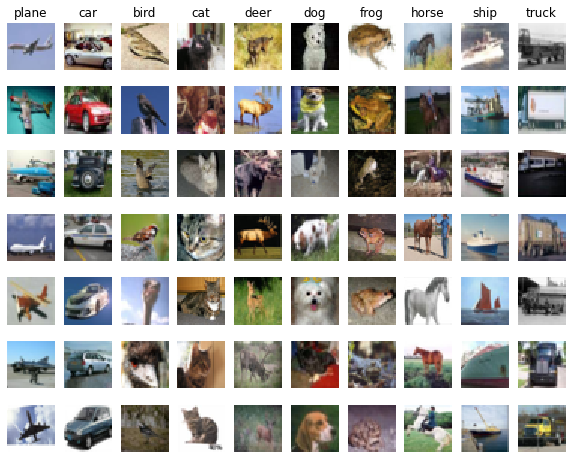

In [ ]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [ ]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In the next cell you are going to implement the main KNearestNeighbor class and keep adding functions to it as and when required in the subsequent steps.

In [ ]:
# You will keep coming back to this cell to add more functions as and when
# required. Right now it is very simple!
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
      self.X_train = X_train
      self.y_train = y_train

    def train(self,X_train,y_train):
      self.X_train = X_train
      self.y_train = y_train

    def compute_distances_two_loops(self,X_test):
        distance = []
        for x in X_test:
          temp =[]
          for x_tr in self.X_train:
            temp.append(np.linalg.norm(x-x_tr))
          distance.append(temp)
        return np.array(distance)
  
    def compute_distances_one_loops(self,X_test):
      distance = np.zeros((X_test.shape[0],self.X_train.shape[0]))
      for i in range(len(X_test)):
        distance[i,:] = np.linalg.norm(self.X_train - X_test[i,:], axis = 1)
      return distance

    def compute_distances_no_loops(self,X_test):
      distance = np.zeros((X_test.shape[0],self.X_train.shape[0]))
      distance = np.sqrt((X_test**2).sum(axis=1)[:, np.newaxis] + (self.X_train**2).sum(axis=1) - 2 * X_test.dot(self.X_train.T))
      return distance

    def predict_labels(self,dist,k):
      y_predicted = []
      for d in dist:
        idx = np.argsort(d)[:k]
        labels = [self.y_train[i] for i in idx]
        most_comm = Counter(labels).most_common(1)
        y_predicted.append(most_comm[0][0])
      return np.array(y_predicted)


Go back to KNearestNeighbor class and add a method to train the classifier. Your function will be called as below. In KNN classifier, this step is a simple memorization of the training data.

In [ ]:
# Make sure to add train() in the classifier class before executing this cell
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
print(X_train.shape, X_test.shape,X_test.shape,y_test.shape)

(5000, 3072) (500, 3072) (500, 3072) (500,)


Go back to KNearestNeighbor class and add a method to compute distances between each pair of test image and train image. You can use two loops to do this. Remember we are using standard L-2 distance metric. Precisely your method should return a distance matrix($D$) where $D(i,j)$ = **L-2** distance between the $i^{th}$ test image and the $j^{th}$ train image. Your function will be called as below

In [ ]:
# Make sure to add compute_distances_two_loops() in the classifier class 
# before executing this cell
print(X_train.shape, X_test.shape,X_test.shape,y_test.shape)
dist2 = classifier.compute_distances_two_loops(X_test)
print(dist2.shape)


(5000, 3072) (500, 3072) (500, 3072) (500,)
(500, 5000)


Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [ ]:
# Make sure to add predict_labels() in the classifier class 
# before executing this cell
# print(dist2)
y_test_pred = classifier.predict_labels(dist2, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
num_test = y_test.shape[0]
# print(num_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


In [ ]:
# Use this cell to compute accuracies for k = 3, 5, 7
K  = [1,3,5,7]
for i in K:
  y_test_pred = classifier.predict_labels(dist2, i)
  num_correct = np.sum(y_test_pred == y_test)
  accuracy = float(num_correct) / num_test
  print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))


Got 137 / 500 correct => accuracy: 0.274000
Got 140 / 500 correct => accuracy: 0.280000
Got 145 / 500 correct => accuracy: 0.290000
Got 146 / 500 correct => accuracy: 0.292000


Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch



In [ ]:
# Use this cell to call the functions
dist1 = classifier.compute_distances_one_loops(X_test)
print(dist1.shape)

dist0 = classifier.compute_distances_no_loops(X_test) 
print(dist0.shape)

(500, 5000)
(500, 5000)


Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [ ]:
# Use this cell to present your timing results for computing distance matrix
import timeit
import pandas as pd
kf = [1,3,5,7]
dist =['dist2','dist1','dist0']
dist2_time = []
dist1_time = []
dist0_time = []

for d in dist:
  if d == 'dist2':
    for i in kf:
      start = timeit.default_timer()
      d = classifier.compute_distances_two_loops(X_test)
      stop = timeit.default_timer()
      y_test_pred = classifier.predict_labels(d, k=i)
      num_correct = np.sum(y_test_pred == y_test)
      num_test = y_test.shape[0]
      accuracy = float(num_correct) / num_test
      print("Accuracy :",accuracy,"for k =",i,"for dist loop 2")
      
      dist2_time.append(stop-start)
      del d
  elif d == 'dist1':
    for i in kf:
      start = timeit.default_timer()
      d = classifier.compute_distances_one_loops(X_test)
      stop = timeit.default_timer()
      y_test_pred = classifier.predict_labels(d, k=i)
      num_correct = np.sum(y_test_pred == y_test)
      num_test = y_test.shape[0]
      accuracy = float(num_correct) / num_test
      print("Accuracy :",accuracy,"for k =",i,"for dist loop 1")
      
      dist1_time.append(stop-start)
      del d
  elif d == 'dist0':
    for i in kf:
      start = timeit.default_timer()
      d = classifier.compute_distances_no_loops(X_test)
      stop = timeit.default_timer()
      y_test_pred = classifier.predict_labels(d, k=i)
      num_correct = np.sum(y_test_pred == y_test)
      num_test = y_test.shape[0]
      accuracy = float(num_correct) / num_test
      print("Accuracy :",accuracy,"for k =",i,"for dist loop 0")
      dist0_time.append(stop-start)
      del d

table ={}
table["Dist computed with 2 loop"]=dist2_time 
table["Dist computed with 1 loop"]=dist1_time 
table["Dist computed with no loop"]=dist0_time 
table = pd.DataFrame(table, index = ['k=1', 'k=3','k=5','k=7'])
print("All time units are : second")
table

Accuracy : 0.274 for k = 1 for dist loop 2
Accuracy : 0.28 for k = 3 for dist loop 2
Accuracy : 0.29 for k = 5 for dist loop 2
Accuracy : 0.292 for k = 7 for dist loop 2
Accuracy : 0.274 for k = 1 for dist loop 1
Accuracy : 0.28 for k = 3 for dist loop 1
Accuracy : 0.29 for k = 5 for dist loop 1
Accuracy : 0.292 for k = 7 for dist loop 1
Accuracy : 0.274 for k = 1 for dist loop 0
Accuracy : 0.28 for k = 3 for dist loop 0
Accuracy : 0.29 for k = 5 for dist loop 0
Accuracy : 0.292 for k = 7 for dist loop 0
All time units are : second


,Dist computed with 2 loop,Dist computed with 1 loop,Dist computed with no loop
k=1,27.431526,31.861659,0.547795
k=3,27.099623,31.330214,0.566639
k=5,27.096537,31.309390,0.564558
k=7,27.248233,31.328131,0.552030


As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

In [ ]:
from sklearn.model_selection import KFold
import pandas as pd
k_nbh=[1,3,5,7]
dictf = []
kf= KFold(n_splits=5, shuffle=True)
sum_val = 0
for k in k_nbh:
    fold = []
    for i, result in enumerate(kf.split(X_train)):
        X_trainf= X_train[result[0]]
        X_testf= X_train[result[1]]
        y_trainf= y_train[result[0]]
        y_testf= y_train[result[1]]
    
        clff = KNearestNeighbor() 
        clff.train(X_trainf, y_trainf)    
        distf = clff.compute_distances_no_loops(X_testf)
        y_predf = clff.predict_labels(distf, k)

        corrf = np.sum(y_predf == y_testf)
        acc_f = float(corrf)/len(y_test_fold)
        fold.append(acc_f)
    fold.append(np.mean(fold))
    dictf.append(fold)
# print(len(dictf))
# print(dictf)
table_f = {}
table_f["K=1"] = dictf[0]
table_f["K=3"] = dictf[1]
table_f["K=5"] = dictf[2]
table_f["K=7"] = dictf[3]
table_f = pd.DataFrame(table_f, index = ['fold_1', 'fold_2','fold_3','fold_4','fold_5','Avg_acc_ofALLfold'])
table_f  


,K=1,K=3,K=5,K=7
fold_1,0.2770,0.2530,0.295,0.2990
fold_2,0.2840,0.2760,0.248,0.3080
fold_3,0.2410,0.2670,0.274,0.2840
fold_4,0.2650,0.2870,0.288,0.2800
fold_5,0.2670,0.2790,0.275,0.2900
Avg_acc_ofALLfold,0.2668,0.2724,0.276,0.2922


In this last part of the notebook you are expected to do the following and present appropriate reports/results:

1. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
2. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
3. What is the time complexity of training using KNN classifier? What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?
4. Bonus: Explore what image features you can use to better the performance of KNN classifier.




In [ ]:
# X_train_all= X_train - X_train.mean()
X_train_mean = np.mean(X_train)
X_test_mean = np.mean(X_test)
X_train_ALLpixel = X_train - X_train_mean
X_test_ALLpixel = X_test - X_test_mean

X_train_Cmean = np.mean(X_train,axis=0)
X_test_Cmean = np.mean(X_test,axis=0)
X_test_Cpxl = X_test - X_test_Cmean
X_train_Cpxl = X_train - X_train_Cmean
 
# X_train_pos= X_train- np.mean(X_train,axis=0)
# X_test_pos= X_test-  np.mean(X_test,axis=0)

# X_test_all= X_test - X_test.mean()

classifier = KNearestNeighbor()
classifier.train(X_train_ALLpixel, y_train)
dists = classifier.compute_distances_no_loops(X_test_ALLpixel)

k_neibh=[1,3,5,7]
dict1 = []
for k in k_neibh:
    y_pred = classifier.predict_labels(dists, i)
    num_correct = np.sum(y_pred == y_test)
    acc = float(num_correct) /len(y_test)
    dict1.append(acc)
    
classifier = KNearestNeighbor()
classifier.train(X_train_Cpxl, y_train)
dists = classifier.compute_distances_no_loops(X_test_Cpxl)

dict2 =[]
for k in k_neibh:
    y_pred = classifier.predict_labels(dists, k)
    num_correct = np.sum(y_pred == y_test)
    acc = float(num_correct) / len(y_test)
    dict2.append(acc)

table ={}
table["Mean of all pixel"]=dict1 
table["mean of column pixel"]=dict2 
table = pd.DataFrame(table, index = ['k=1', 'k=3','k=5','k=7'])
table   


,Mean of all pixel,mean of column pixel
k=1,0.282,0.270
k=3,0.282,0.266
k=5,0.282,0.288
k=7,0.282,0.270


TC of KNN classifier is O(knm)
where k = number of neighbour
      n = number of touples
      m = numbers of features

Answer      
Training Tc = O(1)
Testing(finding distances + prdiction) Tc = O(nmk)

KNN is a non linear classifier

The decision boundaries of kNN are not equivalent to a line in 2D or a hyperplane in higher dimensions.

# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


In [1]:
import pandas as pd
import numpy as np
import os
import sys
# from google.colab import drive
# drive.mount("/content/drive")
FOLDER_PATH = "../assign1/"
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv(os.path.join(FOLDER_PATH,'breast-cancer-wisconsin.data'), na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data.describe()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


1. a) Implement a decision tree(from scratch using only python data structures) as a class.

In [5]:
def check_purity(data):
    lable_column = data[:,-1]
    unique_classes = np.unique(lable_column)
    
    if len(unique_classes) == 1:
        return True
    else:
        return False
    
def classify(data):
    lable_column = data[:,-1]
    unique_classes,count_classes = np.unique(lable_column,return_counts=True)
    index = count_classes.argmax()
    classification = unique_classes[index]
    return classification

def get_potential_splits(data):
    potential_splits = {}
    _,n_columns = data.shape
    for column_index in range(n_columns-1):
        potential_split[column_index]=[]
        values = data[:,column_index]
        unique_values = np.unique(values)
        
        for index in range(len(unique_values)):
            if index !=0:
                curr_val = unique_values[index]
                prev_val = unique_values[index-1]
                potential_split = (curr_val+prev_val)/2
                potential_splits[column_index].append(potential_split) 
    return potential_splits

def split_data(data,split_column,split_value):
    split_column_values = data[:,split_column]
    data_below = data[split_column_values<=split_value]
    data_above = data[split_column_values>split_value]
    return data_below, data_above

def calculate_Entropy(data):
    label_column = data[:,-1]
    _,counts = np.unique(label_column,return_count=True)
    prob = counts/counts.sum()
    entropy  = sum(prob * -np.log2(prob))
    return entropy

def overall_entropy(data_below,data_above):
    n_data_points = len(data_below) + len(data_above)
    p_data_below = len(data_below)/len(n_data_points)
    p_data_above = len(data_above)/len(n_data_points)
    overall_entropy = data_below * calculate_entropy(data_below) +  data_above * calculate_entropy(data_above)
    return overall_entropy

def determine_best_split(data,potential_splits):
    overall_entropy = 1000
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below,data_above = split_data(data,column_index,value)
            curr_entropy = overall_entropy(data_below,data_above)
            if curr_entropy<overall_entropy:
                overall_entropy = curr_entropy
                best_split_column = data_below
                best_split_value = value
    return best_split_column,best_split_value

# decision tree main algo..

In [7]:
def decision_tree(df,counter=0):
    #data preparation
    if counter == 0:
        data = df.values
    else:
        data = df
    #base case
    if check_purity(data):
        classification = classify(data)
        return classification
    else:
        counter+=1
        potential_split = get_potetial_splits(data)
        split_column,split_value = determine_best_split(data,potential_split)
        data_below,data_above = split_data(split_column,split_value)
        #create subtree
        question = "{}<={}".format(split_column,split_value)
        subtree = {quetion:[]}
        #find answer
        yes_answer = decision_tree(data_below,counter)
        no_answer = decision_tree(data_above,counter)
        subtree[question].append(yes_answer)
        subtree[question].append(no_answer)
        
        return subtree

1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

1. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

1. e) Does standardisation and normalisation help in this case? Report

Answer:

2. Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

3. Output a depth first traversal of your decision tree in a file named ```outputimp.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

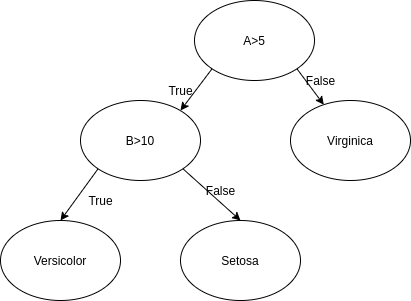
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

5. Report the advantages and disadvantages of decision trees based on the above question.

Answer: